In [1]:
from google.colab import files
uploaded = files.upload()

Saving fcc-forum-pageviews.csv to fcc-forum-pageviews.csv


In [2]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(io.BytesIO(uploaded['fcc-forum-pageviews.csv']))

In [3]:
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


# Task 1
### Clean data

In [4]:
df=df.set_index('date')
df.index.names = ['date']
df.index = pd.to_datetime(df.index)

In [5]:
df= df.loc[(df['value']>df['value'].quantile(q=0.025)) & (df['value']<df['value'].quantile(q=0.975))]

# Task 2
### Draw line plot
Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

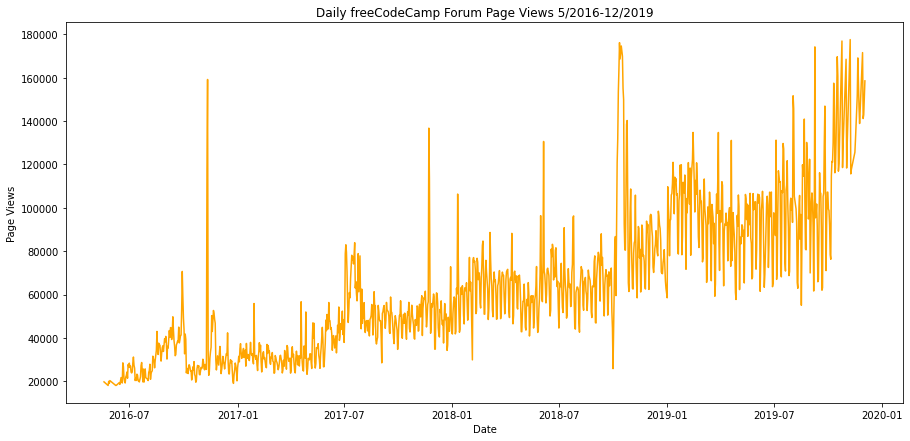

In [6]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = plt.plot(df.index, df['value'], color='orange')
plt.xlabel("Date")  # add X-axis label
plt.ylabel("Page Views")  # add Y-axis label
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")  # add title
plt.show()

#Task 3
### Copy and modify data for monthly bar plot
Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views

In [55]:
df_bar=df.copy(deep=True)
df_bar.reset_index(inplace=True)
df_bar.head()

,date,value
0,2016-05-19,19736
1,2016-05-26,18060
2,2016-05-27,19997
3,2016-05-28,19044
4,2016-05-29,20325


In [56]:
df_bar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1238 non-null   datetime64[ns]
 1   value   1238 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 19.5 KB


In [57]:
df_bar['year'] = pd.DatetimeIndex(df_bar['date']).year
df_bar['month'] = pd.DatetimeIndex(df_bar['date']).month
#df_bar['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['January', 'Feburary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], inplace=True)
df_bar

,date,value,year,month
0,2016-05-19,19736,2016,5
1,2016-05-26,18060,2016,5
2,2016-05-27,19997,2016,5
3,2016-05-28,19044,2016,5
4,2016-05-29,20325,2016,5
...,...,...,...,...
1233,2019-11-24,138875,2019,11
1234,2019-11-29,171584,2019,11
1235,2019-11-30,141161,2019,11
1236,2019-12-01,142918,2019,12


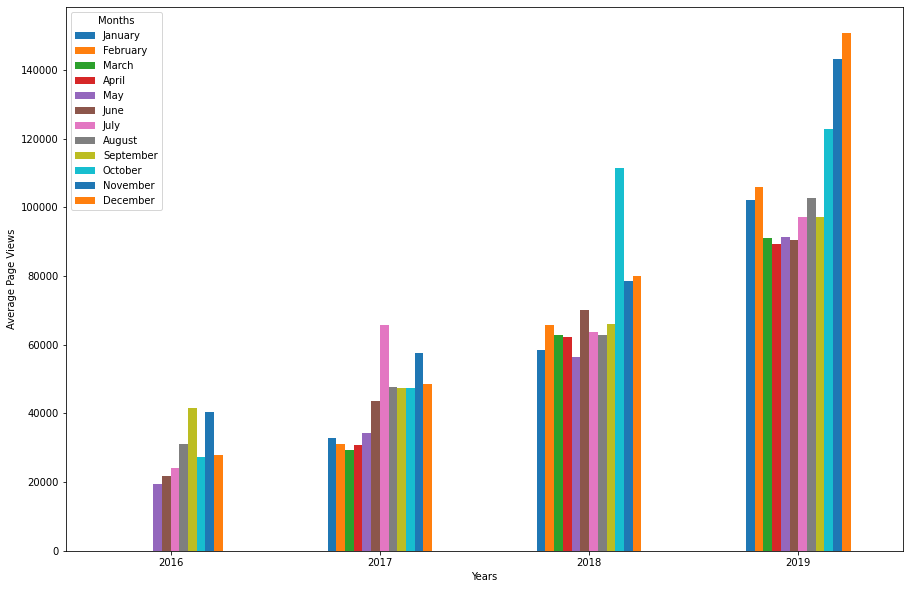

In [58]:
df_bar = df_bar.groupby(["year","month"])['value'].mean().reset_index().sort_values(by=['year','month'])
df_bar = df_bar.set_index('year')
df_bar = df_bar.pivot_table(values = "value", index=df_bar.index, columns="month", aggfunc='first').reset_index()

df_bar = df_bar.set_index('year')
df_bar.columns = ['January','February','March','April','May','June','July','August','September','October','November','December']
df_bar= df_bar.fillna(0)


fig, ax = plt.subplots(figsize=(15, 10))

bar = df_bar.plot(kind='bar', rot=0, ax=ax)
plt.xlabel("Years")
plt.ylabel("Average Page Views")
plt.legend(title='Months')

# Task 4
### Prepare data for box plots (this part is done!)
Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.



In [65]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['Year'] = [d.year for d in df_box.date]
df_box['Month'] = [d.strftime('%b') for d in df_box.date]

In [66]:
df_box

,date,value,Year,Month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


Text(0, 0.5, 'Page Views')

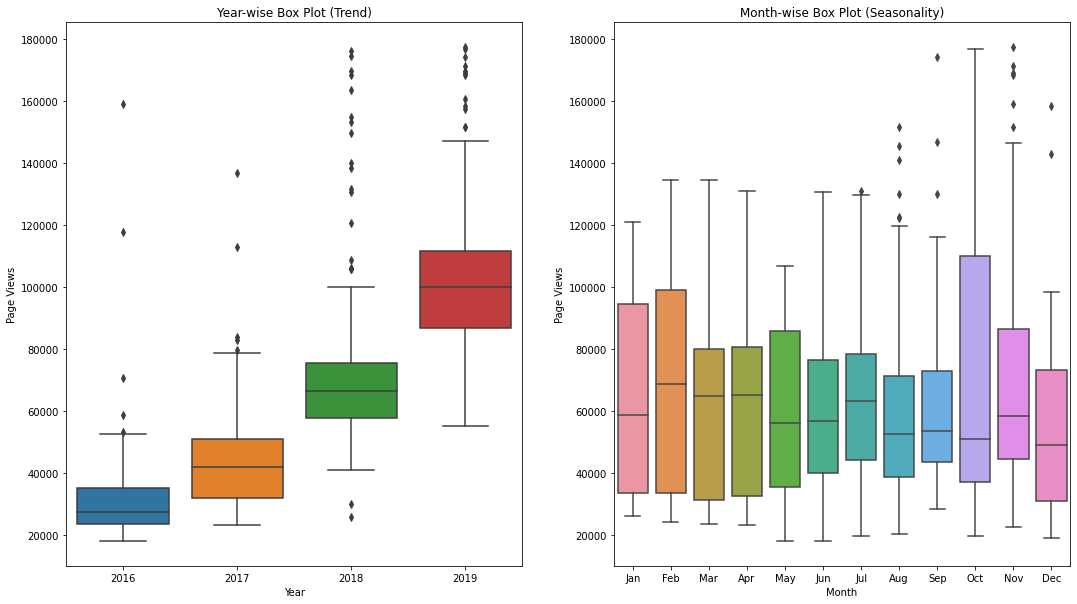

In [67]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(18, 10))
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[1].set_title('Month-wise Box Plot (Seasonality)')

axes[0]=sns.boxplot(ax=axes[0], x = 'Year', y = 'value', data = df_box)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')
m_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
axes[1]=sns.boxplot(ax=axes[1], x = 'Month', y = 'value', data = df_box, order=m_order)

axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')